In [0]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
import os
# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
ls 


 sample_data/  'TonyStark (1).PNG'   TonyStark.PNG


In [0]:
cd /content/images

[Errno 2] No such file or directory: '/content/images'
/content


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving TonyStark.PNG to TonyStark (2).PNG
User uploaded file "TonyStark.PNG" with length 553291 bytes


<class 'PIL.Image.Image'>


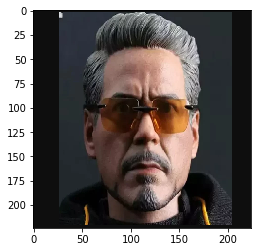

In [0]:
%matplotlib inline
from keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np
img_path = "TonyStark.PNG"
img = image.load_img(img_path, target_size=(224, 224))
print(type(img))
plt.imshow(img)


In [0]:
os.path.isfile("drive/My Drive/TonyStark.PNG")


False

In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# **Implementing GradCAM for the layer block5_conv2**

class ID 837
Implementing GradCAM for the layer block5_conv2


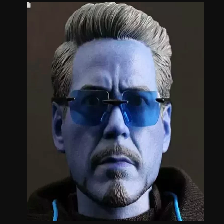

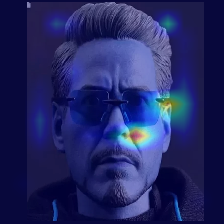

In [0]:
from google.colab.patches import cv2_imshow
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import cv2
import sys
gradcam_test_features= [img]
#for idx in range(4):
img=image.load_img(img_path, target_size=(224, 224))
img = np.asarray(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
  
x = preprocess_input(x)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print("class ID", class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv2")
grads = K.gradients(class_output, last_conv_layer.output)[0]
#print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
#print("conv_layer_output_value.shape")
#print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
Original_img=new_image=cv2.resize(img,(224,224))
print("Implementing GradCAM for the layer block5_conv2")
cv2_imshow(Original_img)
superimposed_img=cv2.resize(superimposed_img,(224,224))
cv2_imshow(superimposed_img)

# **Implementing GradCAM for the layer block5_conv1**


Implementing GradCAM for the layer block5_conv1


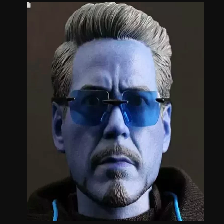

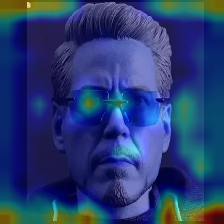

In [0]:
last_conv_layer = model.get_layer("block5_conv1")
grads = K.gradients(class_output, last_conv_layer.output)[0]
#print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
#print(conv_layer_output_value.shape)
#print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
Original_img=new_image=cv2.resize(img,(224,224))
print("Implementing GradCAM for the layer block5_conv1")
cv2_imshow(Original_img)
superimposed_img=cv2.resize(superimposed_img,(224,224))
cv2_imshow(superimposed_img)